In [12]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from labellines import labelLine, labelLines
from matplotlib.pyplot import cm
from importlib import reload

import src.utils as utils

seedno = 12345
rng = np.random.default_rng(seed=seedno)

In [13]:
reload(utils)

<module 'src.utils' from '/Users/leandrosb/Documents/GitHub/AMM/src/utils.py'>

In [14]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"
plt.rc("text", usetex = True)
plt.rc("text.latex", preamble=r'\usepackage{amsmath,amsfonts}')
fs = 16
dpi = 300

In [15]:
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amsfonts}')
# font size for labels in plots
fs = 16
dpi = 300

In [23]:
y_0 = 1_000
Z_0 = 100.
depth = (Z_0*y_0)*(y_0)

In [24]:
y_grid = np.array([i for i in range(y_0-20,y_0+20)])
np.mean(np.diff(y_grid))

import pickle

params = { "int_sell": 10., "int_buy": 10., "kappa": 1./np.mean(np.diff(y_grid)), "oracleprice": 100., "depth": depth, "y_grid": y_grid, "y_0": y_0, "T": 1., "pen_const": 0.,}

with open("src/params.pkl", "wb") as f:pickle.dump(params,f)

In [25]:
AMM = utils.AMM(**params)
alpha,beta = AMM._calculate_fees_t(0.5)

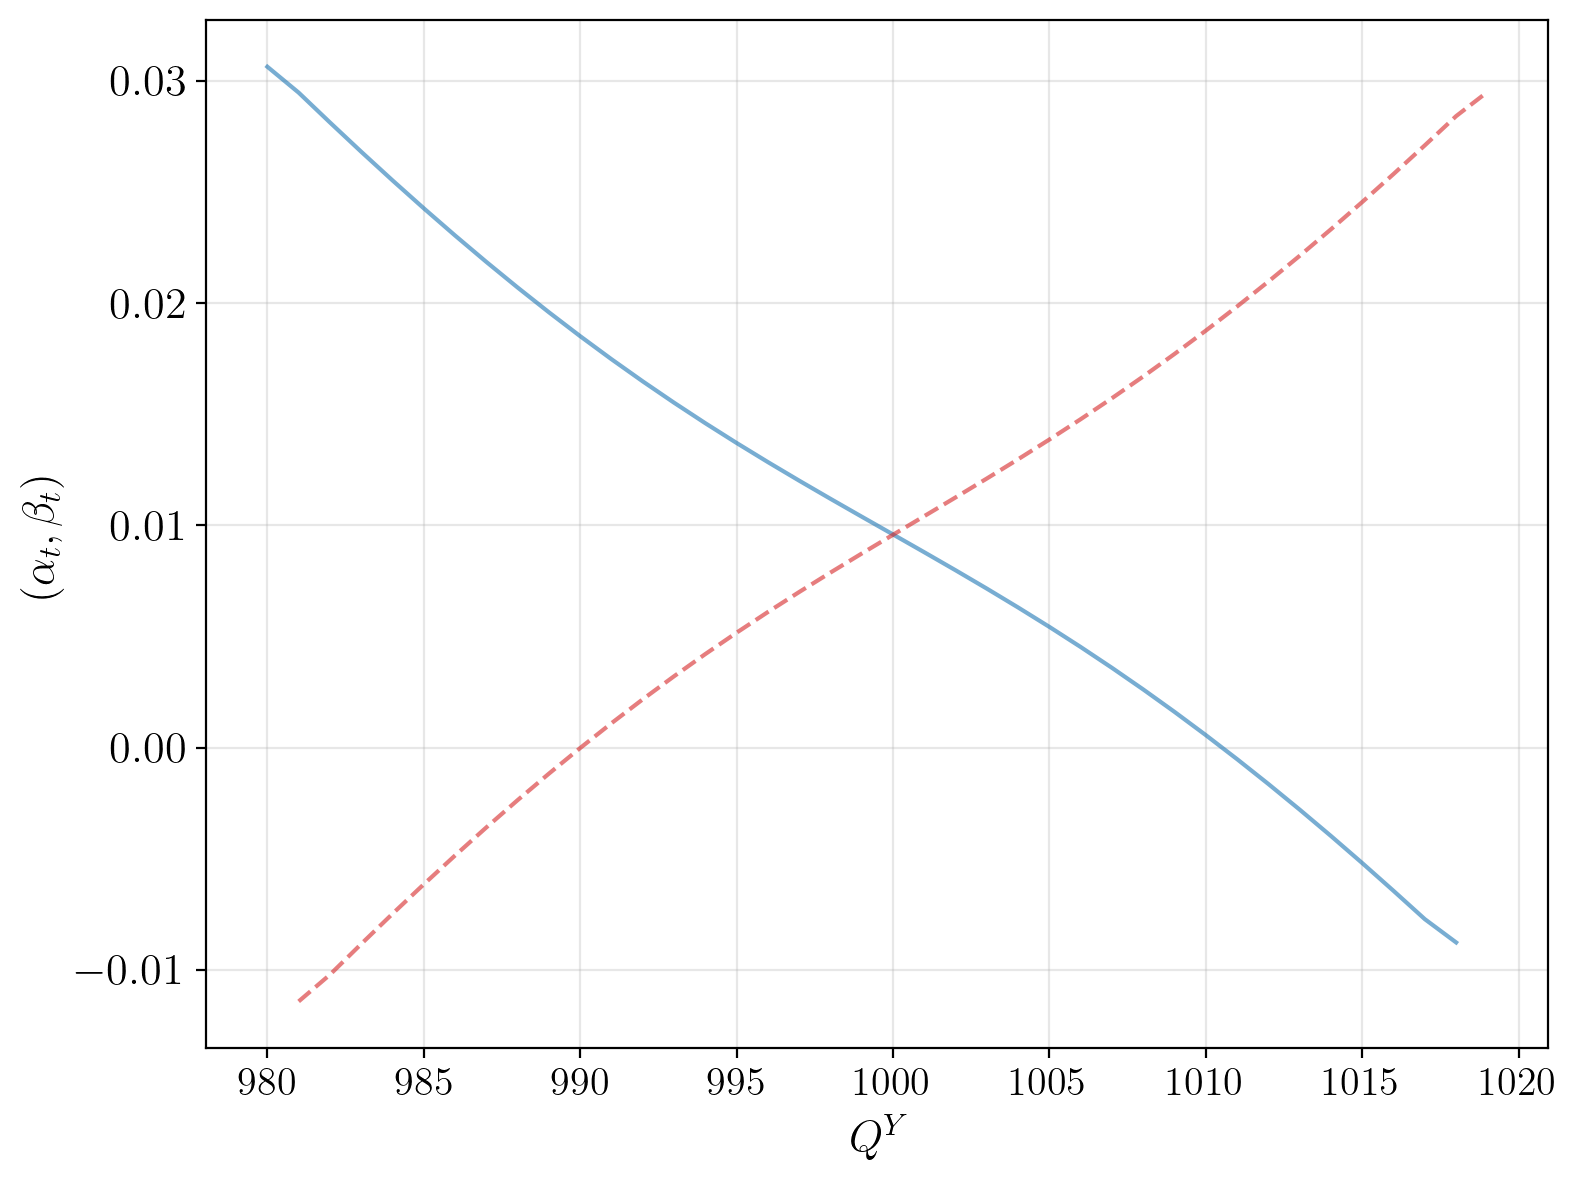

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid, alpha[:], '-', color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid, beta[:], '--', color='tab:red', alpha=0.6)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel(r'$(\alpha_t, \beta_t)$', fontsize=fs)

plt.tight_layout()
#plt.savefig('figures_2/approx_opt_fees.pdf', format="pdf", dpi=dpi)
plt.show()

In [881]:
pen_const_value = np.zeros(6)
for i in range(0,5):
    pen_const_value[i+1] = 10**i

In [882]:
alpha = np.ones((len(AMM.y_grid), len(pen_const_value)))
beta = np.ones_like(alpha)
for i, pen_const in enumerate(pen_const_value):
    params_aux = params.copy()
    params_aux["pen_const"] = pen_const
    AMM_aux = utils.AMM(**params_aux)
    alpha[:,i], beta[:,i] = AMM_aux._calculate_fees_t(0.5)

In [883]:
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

cmap = plt.get_cmap("viridis")

norm = Normalize(vmin = min(pen_const_value), vmax = max(pen_const_value))
sm = ScalarMappable(norm = norm, cmap=cmap)

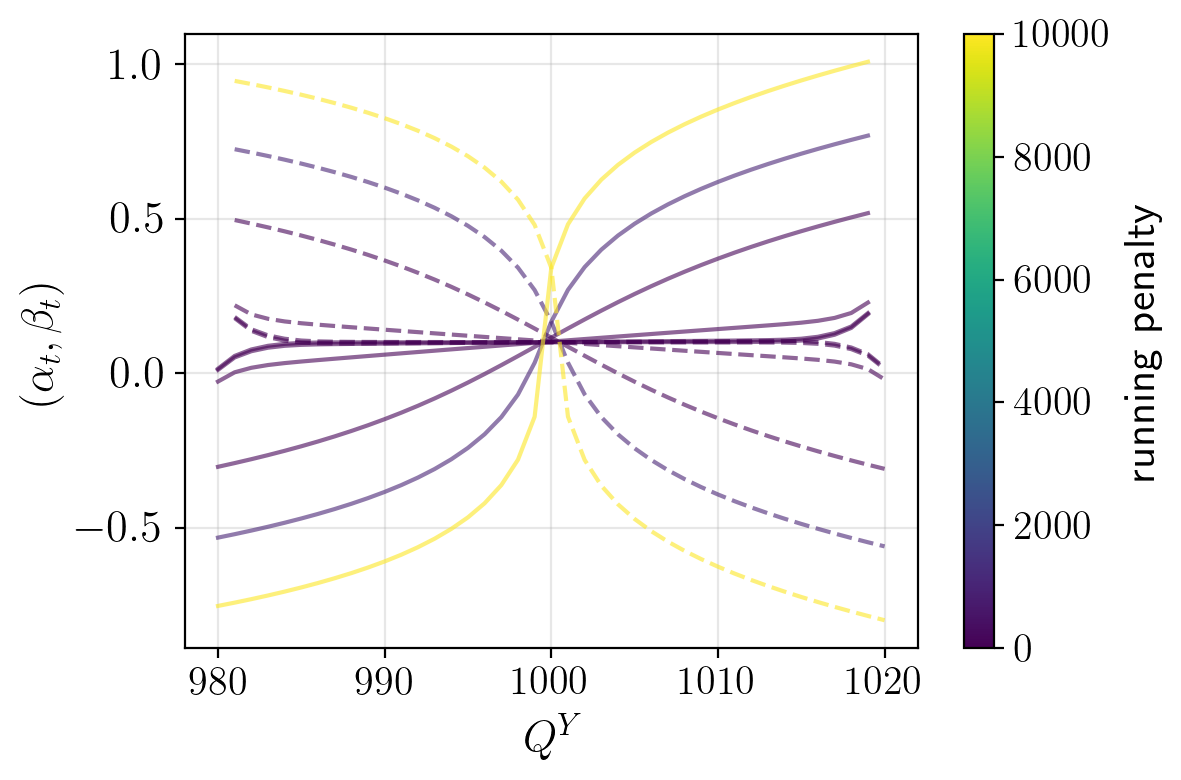

In [884]:
fig, ax = plt.subplots(1, 1, figsize = (6,4), sharey=False, sharex=True)

for i,p in enumerate(pen_const_value):
    color = cmap(norm(pen_const_value[i]))
    ax.plot(AMM.y_grid, alpha[:,i], '-', color=color, alpha=0.6)
    ax.plot(AMM.y_grid, beta[:,i], '--', color=color, alpha=0.6)


plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel(r'$(\alpha_t, \beta_t)$', fontsize=fs)

cbar = fig.colorbar(sm, ax = ax, orientation = "vertical")
cbar.set_label("running penalty", fontsize=fs)

plt.tight_layout()
#plt.savefig('figures_2/approx_opt_fees_pen.pdf', format="pdf", dpi=dpi)
plt.show()

In [885]:
Nt = 100
t_vector = np.linspace(0, AMM.T,num=Nt)

alpha = np.ones((len(AMM.y_grid), len(t_vector)))
beta = np.ones_like(alpha)

for i,t in enumerate(t_vector):
    alpha[:,i],beta[:,i] = AMM._calculate_fees_t(t)

In [886]:
cmap = plt.get_cmap("viridis")

norm = Normalize(vmin=min(AMM.y_grid), vmax=max(AMM.y_grid))
sm = ScalarMappable(norm=norm, cmap=cmap)

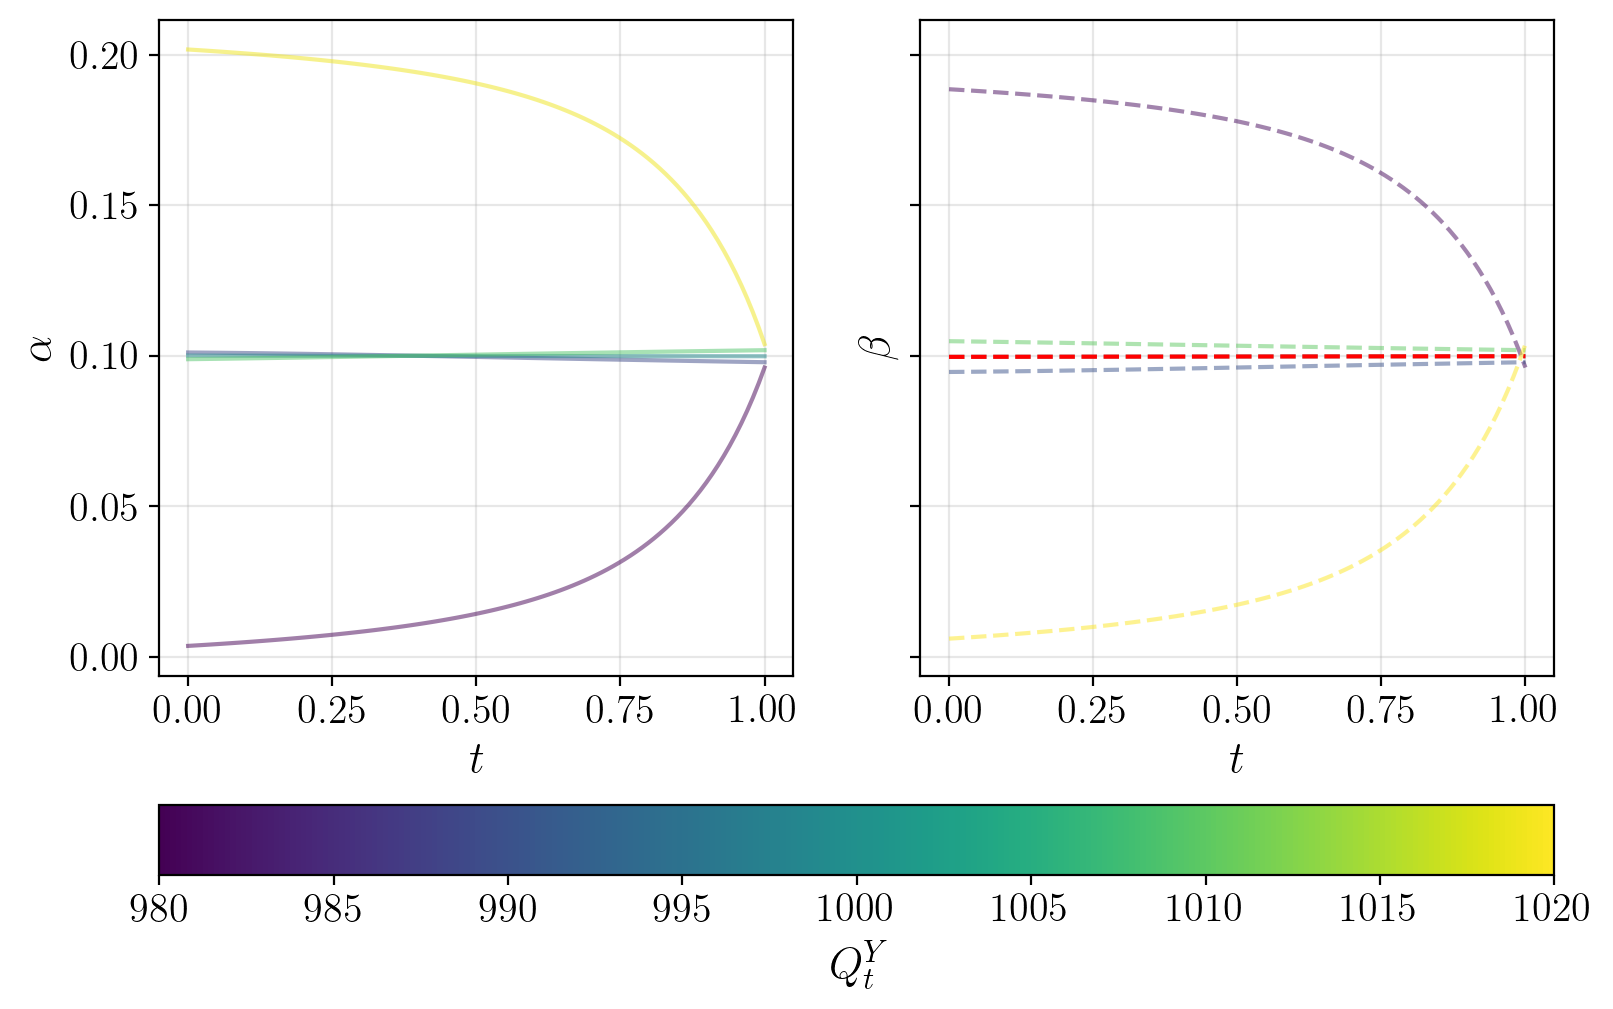

In [887]:
fig, ax = plt.subplots(1,2, figsize = (9,6), sharey=True)
indices_alpha = np.linspace(0, len(alpha)- 2, 5, dtype=int)
indices_beta = np.linspace(1, len(alpha)- 1, 5, dtype=int)
desired_values_alpha = [y_grid[i] for i in indices_alpha]
desired_values_beta = [y_grid[i] for i in indices_beta]
for i,q in enumerate(AMM.y_grid):
    if q in desired_values_alpha:
        color = cmap(norm(AMM.y_grid[i]))
        if q < desired_values_beta[-1]:
            ax[0].plot(t_vector, alpha[i,:],'-', color = color, alpha = 0.5)#, label="q="+str(q), colors[iq])
        if q == AMM.y_0:
            ax[0].plot(t_vector, alpha[i,:],'-', color = "red")#, label="q="+str(q), colors[iq])
    
for i,q in enumerate(AMM.y_grid):
    if q in desired_values_beta:
        color = cmap(norm(AMM.y_grid[i]))
        if q > desired_values_alpha[0]:
            ax[1].plot(t_vector, beta[i,:],'--', color = color, alpha = 0.5) #, label="q="+str(q), colors[iq])
        if q == AMM.y_0:
            ax[1].plot(t_vector, beta[i,:],'--', color = "red") # label=" ", colors[iq])
        
ax[0].set_xlabel(r'$t$', fontsize = fs)
ax[1].set_xlabel(r'$t$', fontsize = fs)
ax[0].set_ylabel(r'$\alpha$', fontsize = fs)
ax[1].set_ylabel(r'$\beta$', fontsize = fs)
ax[0].grid(alpha=0.3)
ax[1].grid(alpha=0.3)

# Add colorbar
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.14)
cbar.set_label(r'$Q^Y_t$', fontsize=fs)

#plt.tight_layout()
#plt.savefig('figures_2/fees_through_time_fct_of_Q_t.pdf', format="pdf", dpi=dpi)
plt.show()

In [888]:
params_95 = params.copy()
params_95["oracleprice"] = 95

In [889]:
AMM = utils.AMM(**params_95)
alpha,beta = AMM._calculate_fees_t(0.5)

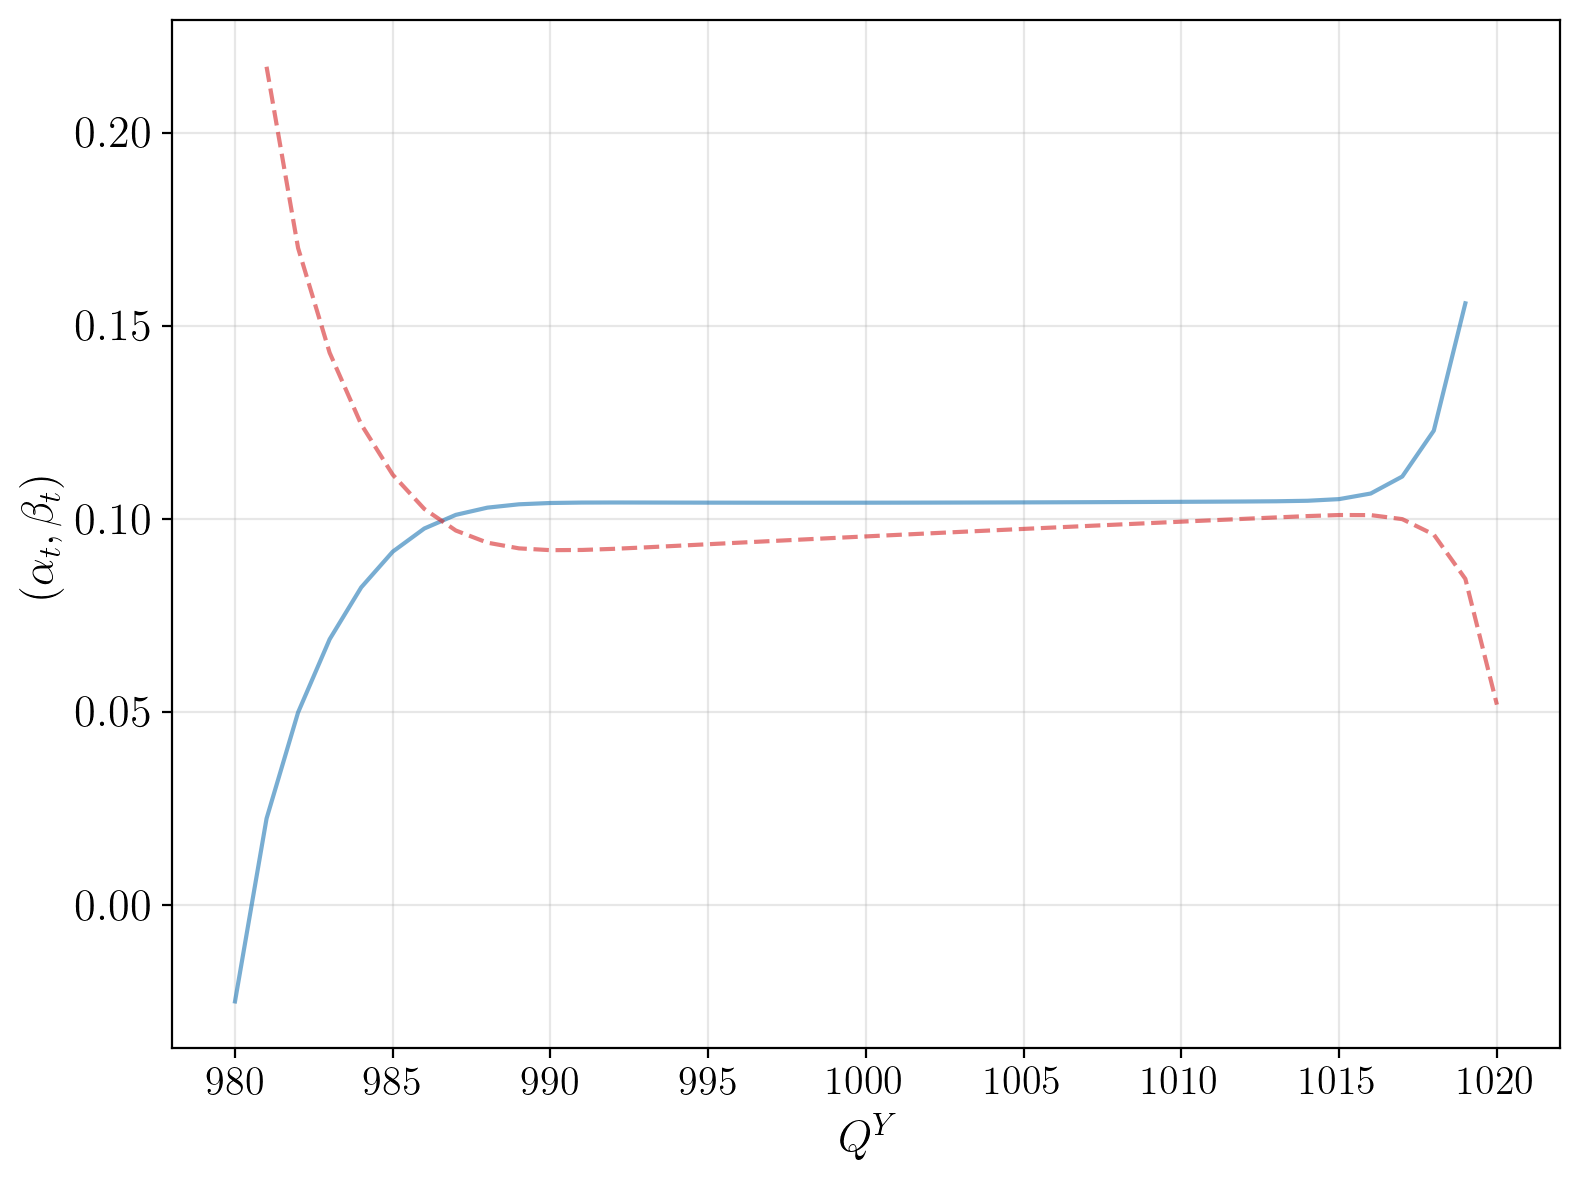

In [890]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid, alpha[:], '-', color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid, beta[:], '--', color='tab:red', alpha=0.6)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel(r'$(\alpha_t, \beta_t)$', fontsize=fs)

plt.tight_layout()
#plt.savefig('figures_3/approx_opt_fees_s=95.pdf', format="pdf", dpi=dpi)
plt.show()

In [891]:
y_0 = 1026
y_grid = [np.sqrt((depth)/(depth/((y_0)**2) - i*0.1)) for i in range(-40,41)]

In [892]:
params_95["y_grid"] = y_grid

In [893]:
AMM = utils.AMM(**params_95)
alpha,beta = AMM._calculate_fees_t(0.5)

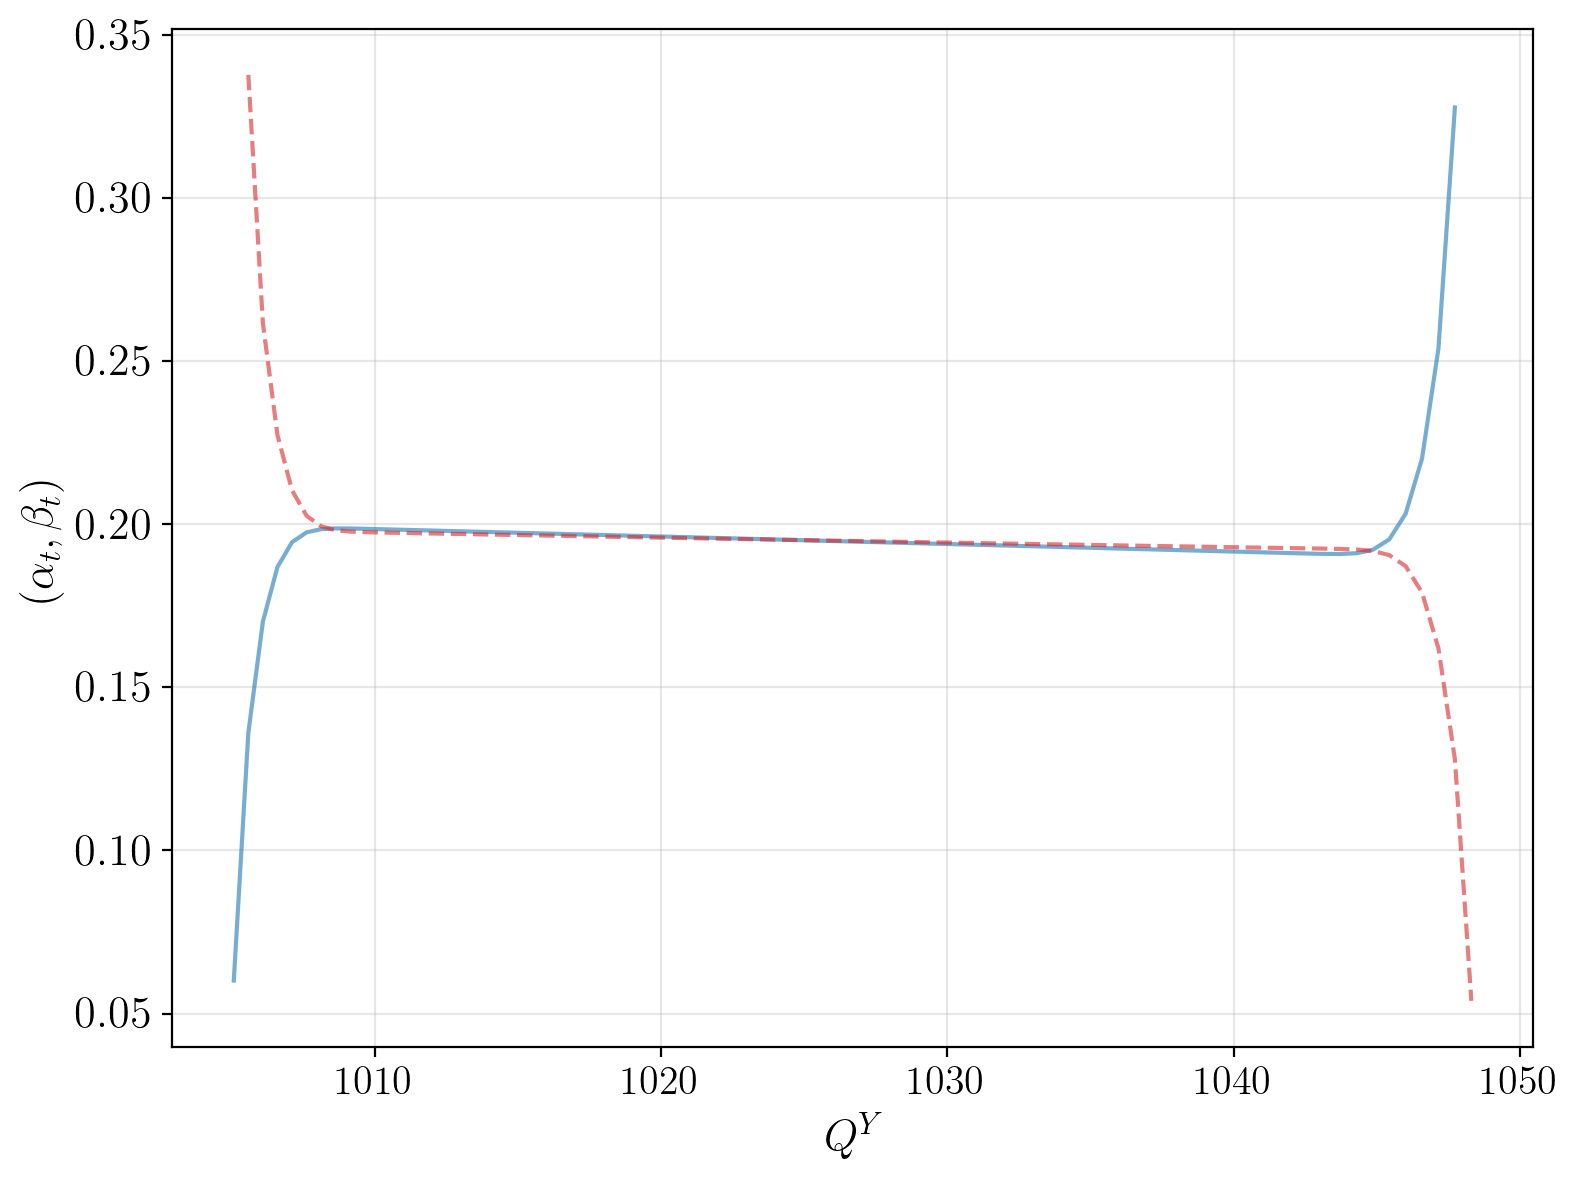

In [894]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid, alpha[:], '-', color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid, beta[:], '--', color='tab:red', alpha=0.6)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel(r'$(\alpha_t, \beta_t)$', fontsize=fs)

plt.tight_layout()
#plt.savefig('figures_3/approx_opt_fees_s=95_adj_y0.pdf', format="pdf", dpi=dpi)
plt.show()

In [895]:
params_105 = params.copy()
params_105["oracleprice"] = 105

In [896]:
AMM = utils.AMM(**params_105)
alpha,beta = AMM._calculate_fees_t(0.5)

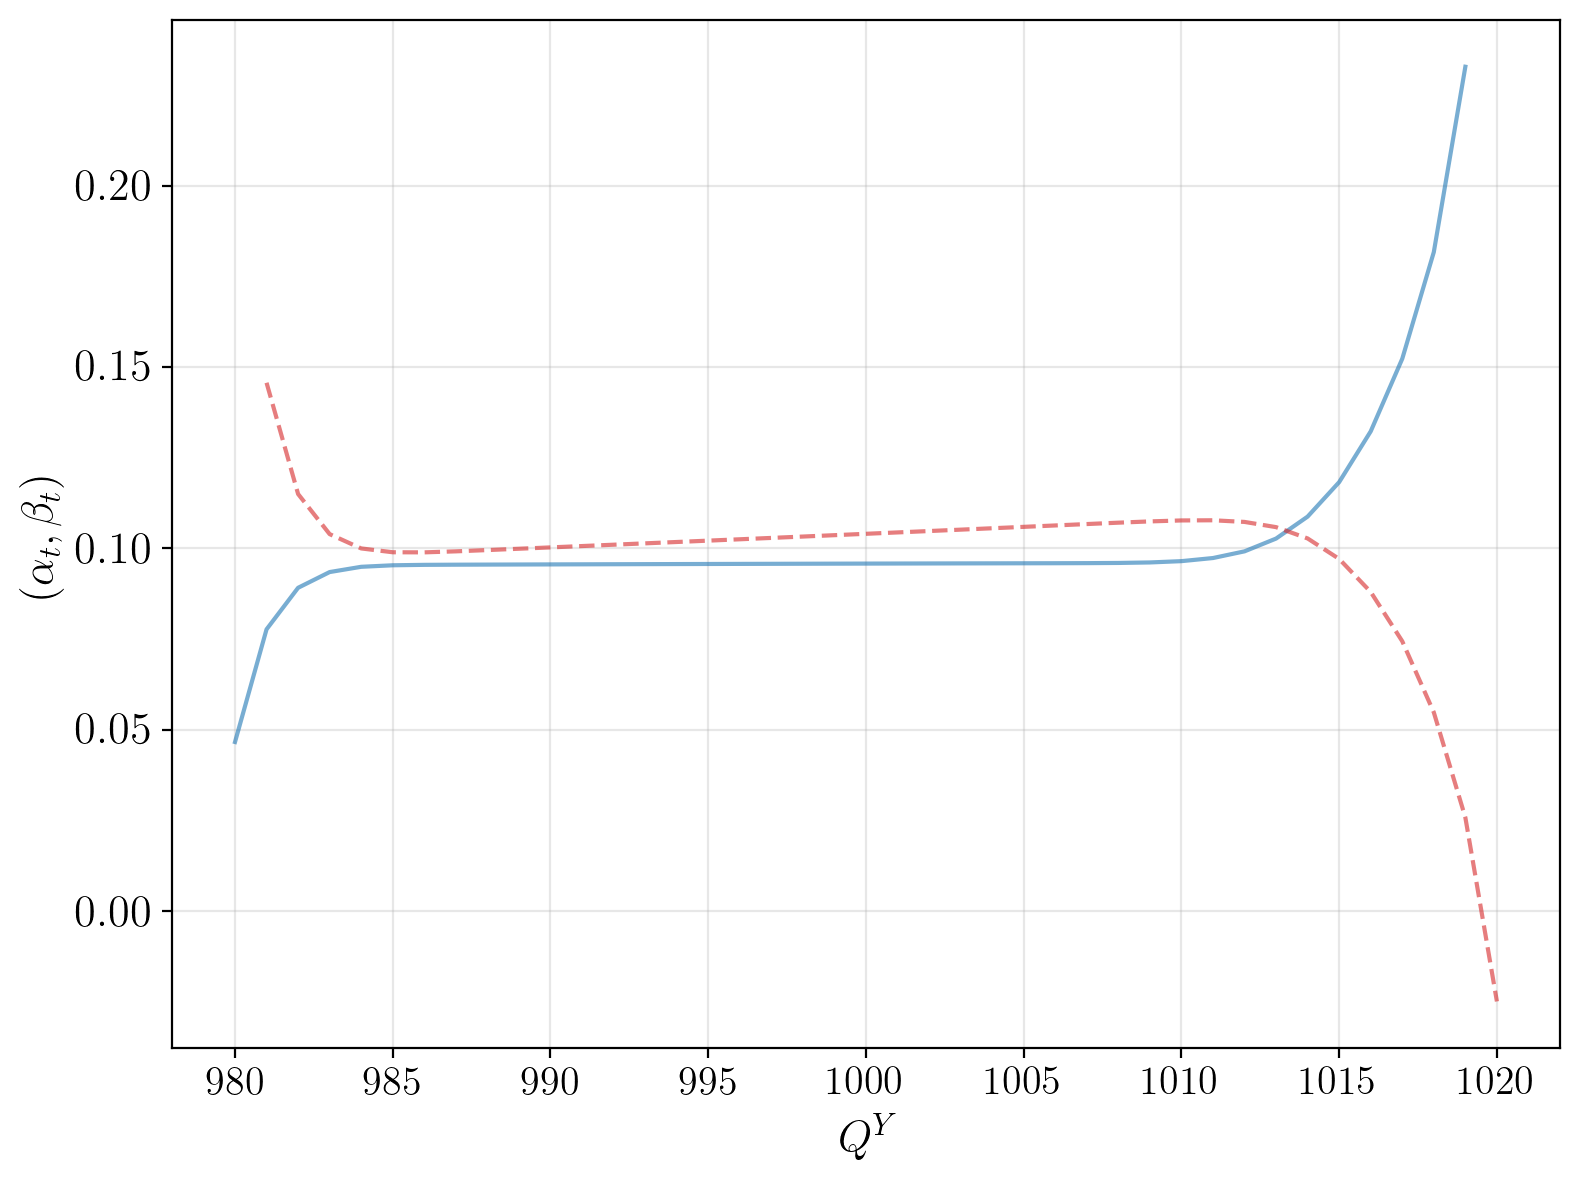

In [897]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid, alpha[:], '-', color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid, beta[:], '--', color='tab:red', alpha=0.6)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel(r'$(\alpha_t, \beta_t)$', fontsize=fs)

plt.tight_layout()
#plt.savefig('figures_3/approx_opt_fees_s=105.pdf', format="pdf", dpi=dpi)
plt.show()

In [898]:
y_0 = 975.90
y_grid = [np.sqrt((depth)/(depth/((y_0)**2) - i*0.1)) for i in range(-40,41)]

In [899]:
params_105["y_grid"] = y_grid

In [900]:
AMM = utils.AMM(**params_105)
alpha,beta = AMM._calculate_fees_t(0.5)

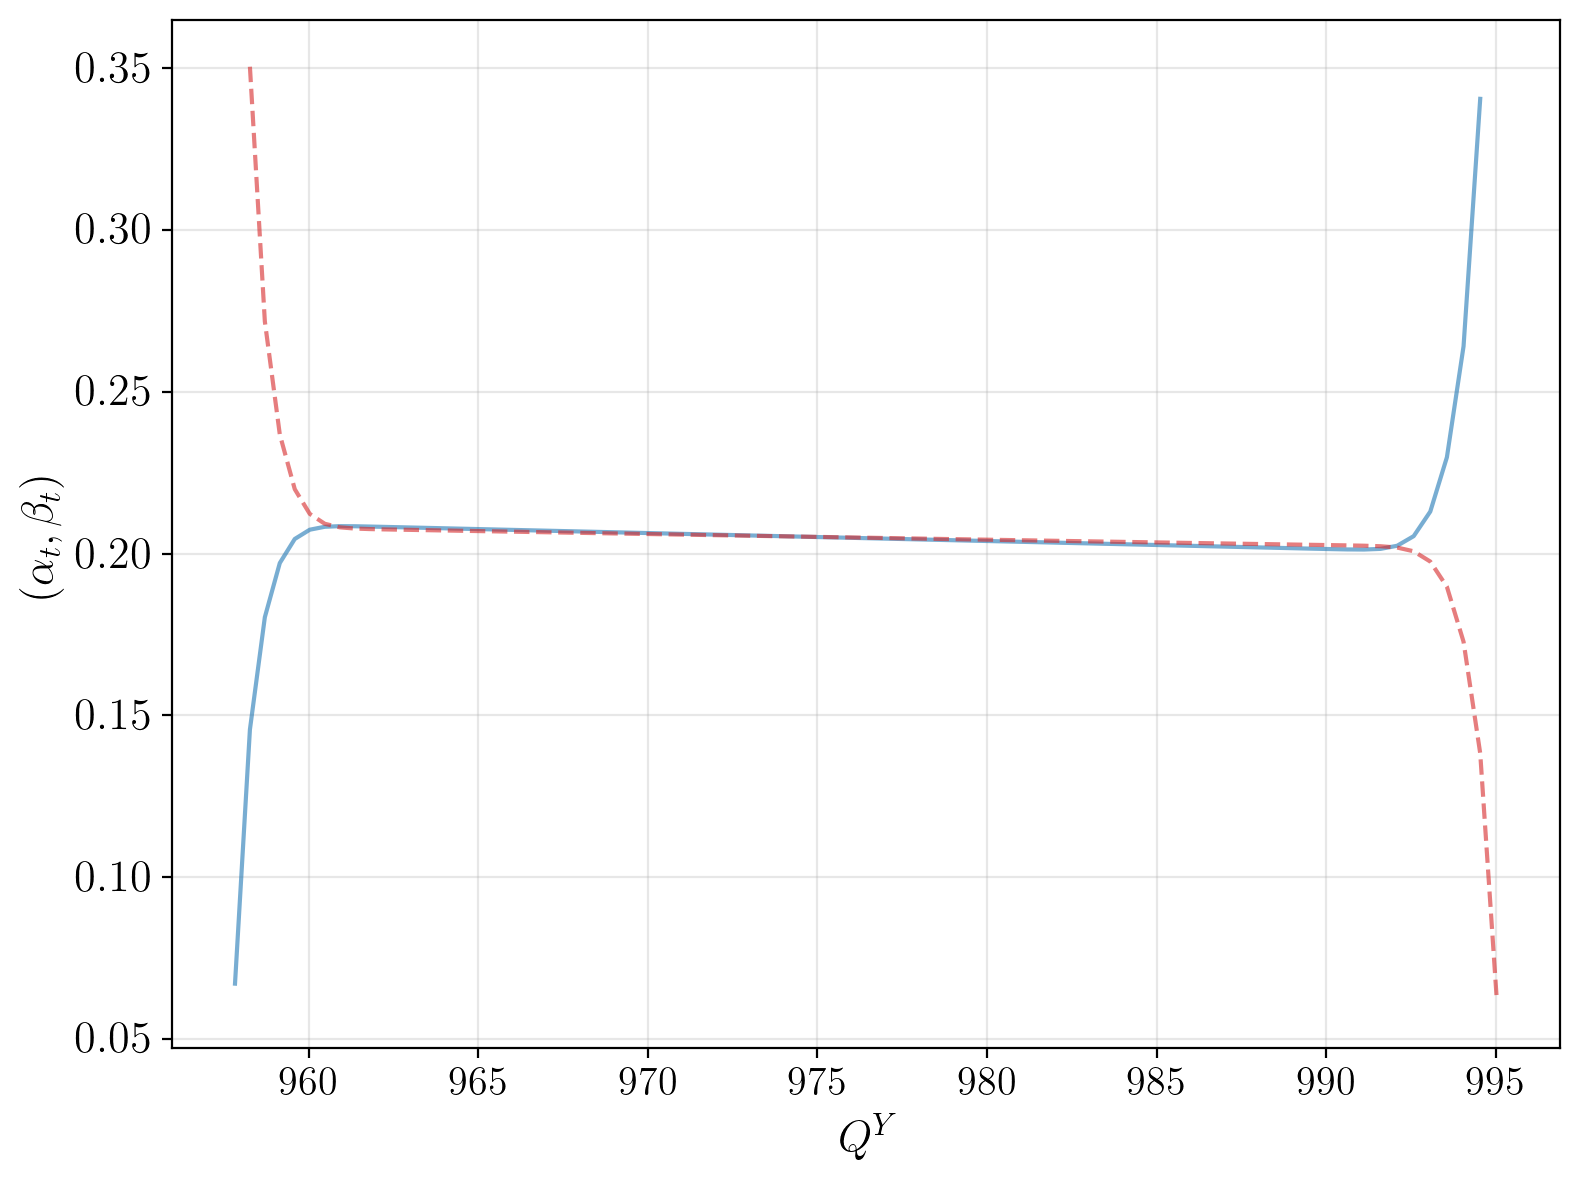

In [901]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid, alpha[:], '-', color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid, beta[:], '--', color='tab:red', alpha=0.6)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel(r'$(\alpha_t, \beta_t)$', fontsize=fs)

plt.tight_layout()
#plt.savefig('figures_3/approx_opt_fees_s=105_adj_y0.pdf', format="pdf", dpi=dpi)
plt.show()